This is a final project I collaborated with two other people on. We conducted robust research on the videogames data set to develop a logistic regression model that could effectively predict critic review sentiment considering significant features.

In [ ]:
#Imports here

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import math
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression


import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore scikit-learn ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

## 1. Introduction

### Research Introduction and Motivation

Exploring the relationship between review scores and the features that make a video game can reveal interesting conclusions. Through data science, we could find out what about a video game will most impact the critics' review score. Video game developers may find our predictive model helpful as they could adjust their game development to optimize the critic reception.

According to Game Developer, game design criticism grows more important every year and studios fail because they do not know what makes a game successful. Fans also use critic scores as a reference for their decision in buying a game. A behavioral study conducted by Electronic Entertainment Design and Research and the Southern Methodist University Guildhall showed subjects were more likely to buy a game and give it a higher personal review score when presented a high critic review score.

 To succeed as a video game developer it is important to understand the public reception and the impact of the critics. A developer would likely desire a classifier that is better at classifying review scores that are positive of our threshold because their goal is to make a game that will succeed.


### Research Goal Statement

**Primary Research Goal:** Build a predictive model that
will effectively predict ``Review Score`` for new datasets.

**Secondary Research Goal:** Build a predictive model that yields reliable interpretative insights about the nature of the relationship between the variables in the dataset.

Our research will be considering the following five explanatory variables: ``Completionist Length``, ``Polled Main Story Length``, ``Main Story Length``, ``Max Players``, and ``Genre``.



## 2. Dataset Discussion

### Dataset Display

In [ ]:
import pandas as pd
df = pd.read_csv('video_games.csv')
df.head()

,Title,Features.Handheld?,Features.Max Players,Features.Multiplatform?,Features.Online?,Metadata.Genres,Metadata.Licensed?,Metadata.Publishers,Metadata.Sequel?,Metrics.Review Score,...,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,...,24.916667,29.966667,25.000000,16,18.333333,14.333333,18.316667,14.500000,21,9.700000
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,...,9.750000,9.866667,9.750000,2,9.616667,10.333333,11.083333,10.000000,3,9.583333
2,WarioWare Touched!,True,2,True,True,"Action,Racing / Driving,Sports",True,Nintendo,True,81,...,3.850000,5.666667,3.333333,11,2.783333,1.916667,2.933333,1.833333,30,1.433333
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,...,12.766667,17.316667,12.500000,12,10.483333,8.350000,11.083333,8.000000,23,5.333333


In [ ]:
df.shape

(1212, 36)

There are 1212 rows before cleaning.

### Original Dataset Information

 The data was originally collected by Dr. Joe Cox and, according to him, "this study uses a unique data set of individual video game titles to estimate the effect of an exhaustive set of observable characteristics on the likelihood of a video game becoming a block-buster title". There are over 1,000 observations each representing a video game title and the dataset includes many describing variables about the features, metrics, length, and metadata for each. The data is a "snapshot of the US videogame market during September 2011" and draws from sources such as Metacritic for reviews, Mobygames for gameplay characteristics, and VGcharts for unit sales.

  The data is not included of all videogame titles as there are less popular titles that were left out. This is important when considering our research question because there could be games not included that would skew the outcome. For example, a less popular game that was given a rating by critics that does not follow our data could make us reconsider our findings or reconstruct the analysis.

### Selected Variables

Our response variable will be ``Review Score``. This score comes from Metacritic and is on a 0-100 scale. In our research, we will try to predict if a score of a game will be 72 or higher. We chose this number because it is the median score for games in the dataset and should be a good baseline of a positive review vs. a negative review.

Our five explanatory variables are ``Completionist Length``, ``Polled Main Story Length``, ``Main Story Length``, ``Max Players``, and ``Genre``. The different length get a grasp of how long players of different playstyles take to complete the game. Some players like to 100% a game which is why we included completionist playstyle and some are more casual just looking to play the main story. We included polled main story and actual main story length to incorporate how long a game feels vs. the reality of it. We tried to choose length variables that are not collinear for the sake of further research.

Our categorical variables are important to the research. Different `Genre` types are taken more seriously by critics than others. We also decided to incorporate `Max Players` by including a binary Multiplayer variable which will be based on if Max Players is greater than one. We decided to do this because the Max Players data is more discrete and works well when transformed into a categorical variable. A game being multiplayer is important to review scores since it opens doors to different features and playing with friends.

## 3. Dataset Cleaning

### Missing Value Detection and Cleaning

To clean our data, let's first make sure that our dataframe is only comprised of our explanatory variables and response variable.

In [ ]:
df = df[['Length.Completionists.Median',
         'Length.Main Story.Polled',
         'Length.Main Story.Median',
         'Features.Max Players',
         'Metadata.Genres',
         'Metrics.Review Score' ]]


It is also nice to rename our columns for interpretability purposes and to make future code easier.

In [ ]:
df = df.rename(columns={'Length.Completionists.Median':'Comp_Length',
                        'Length.Main Story.Polled' : 'Polled_Length',
                        'Length.Main Story.Median' : 'Main_Length',
                        'Features.Max Players' : 'Max_Players',
                        'Metadata.Genres' : 'Genre',
                        'Metrics.Review Score' : 'Score'})
df.head()

,Comp_Length,Polled_Length,Main_Length,Max_Players,Genre,Score
0,30.000000,21,14.500000,1,Action,85
1,0.000000,3,10.000000,1,Strategy,89
2,7.250000,30,1.833333,2,"Action,Racing / Driving,Sports",81
3,0.000000,0,0.000000,1,Sports,81
4,72.566667,23,8.000000,1,Action,61


Let's make sure there are no implicit missing values in our dataframe.

In [ ]:
df.dtypes

Comp_Length      float64
Polled_Length      int64
Main_Length      float64
Max_Players        int64
Genre             object
Score              int64
dtype: object

`Comp_Length`, `Polled_Length`, `Main_Length`, `Max_Players` and `Score` all being numerical data types tells us there are no implicit missing values in those columns.

In [ ]:
np.unique(df['Genre'].values)

array(['Action', 'Action,Adventure', 'Action,Adventure,Racing / Driving',
       'Action,Adventure,Racing / Driving,Sports',
       'Action,Adventure,Role-Playing (RPG)', 'Action,Adventure,Strategy',
       'Action,Educational', 'Action,Racing / Driving',
       'Action,Racing / Driving,Role-Playing (RPG)',
       'Action,Racing / Driving,Role-Playing (RPG),Strategy',
       'Action,Racing / Driving,Simulation',
       'Action,Racing / Driving,Sports',
       'Action,Racing / Driving,Sports,Strategy',
       'Action,Role-Playing (RPG)',
       'Action,Role-Playing (RPG),Simulation',
       'Action,Role-Playing (RPG),Simulation,Sports,Strategy',
       'Action,Role-Playing (RPG),Strategy', 'Action,Simulation',
       'Action,Simulation,Sports', 'Action,Simulation,Strategy',
       'Action,Sports', 'Action,Strategy', 'Adventure',
       'Adventure,Educational,Strategy', 'Adventure,Role-Playing (RPG)',
       'Adventure,Role-Playing (RPG),Strategy', 'Adventure,Simulation',
       'Adventu

By looking at the values for the genres, we can tell there are no implicit missing values. Now we know that there are no missing values in our dataframe meaning we do not have to drop any rows. The con of this technique is that it may take a while to look through all of the categorical values. However, the pro is that we have reduced the issues we would encounter in future analysis.

### Sample Size Cleaning

We will only be including the genres with more than 10 observations to ensure we have a good sample size for each value.

In [ ]:
genre_counts = df['Genre'].value_counts()
top_genre_counts = genre_counts[genre_counts > 10]
top_genre_counts

Genre
Action                         476
Sports                         166
Strategy                        62
Action,Role-Playing (RPG)       55
Racing / Driving                53
Role-Playing (RPG)              52
Action,Strategy                 45
Action,Racing / Driving         40
Simulation                      30
Action,Simulation               28
Action,Adventure                28
Adventure                       21
Role-Playing (RPG),Strategy     20
Action,Sports                   20
Racing / Driving,Sports         19
Simulation,Strategy             12
Name: count, dtype: int64

In [ ]:
top_genre = top_genre_counts.index
df = df[df['Genre'].isin(top_genre)]
df.shape

(1127, 6)

We dropped 85 rows.

### Outlier Cleaning - Two Variable Outlier Inspection

We will inspect the relationship for every pair of numerical explanatory variables using scatterplots to detect outliers.

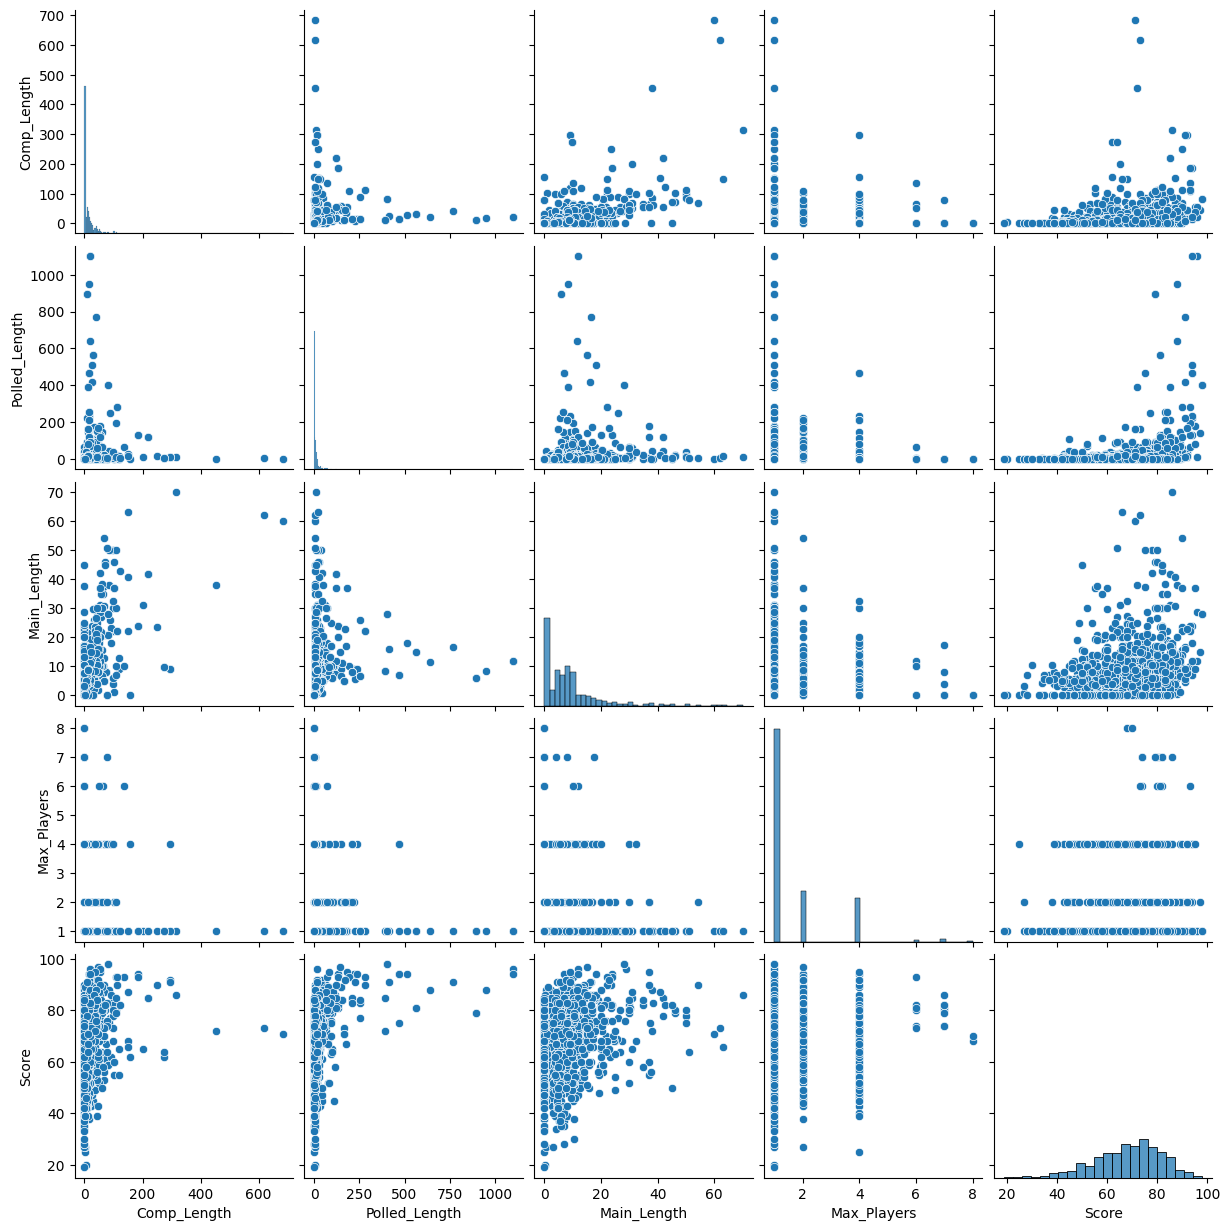

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
df = df[(df['Comp_Length'] < 400) & (df['Polled_Length'] < 600) & (df['Main_Length'] < 60)]
df = df[(df['Comp_Length'] > 0) & (df['Polled_Length'] > 0) & (df['Main_Length'] > 0)]
df.shape

(569, 6)

After our data cleaning, we are left with 569 rows meaning we removed 558 rows. We removed outliers from the dataframe as well as some 0 values which did not make sense in context. For example, the length of time to finish the game could not be at 0, that is impossible. It is important to note that the pro of dropping data is that our models be more representative of the rest of the data which makes for more efficiency. The con of dropping data is that our models will not be representative of the full dataset.

### Other Data Cleaning

To make the answer to the research question more clear, let's simplify our genres. Some of the variables included multiple genres split by a comma which could be confusing because the primary genre is not specified. The values that include 'Racing' such as `Racing / Driving` and `Racing / Driving, Sports` seem to mostly fall under the racing genre, so let's include them with the `Racing`. Other than that, removing rows with multiple genres will help make our outcomes more distinct.

In [ ]:
Racing_Genres = ['Racing / Driving', 'Racing / Driving,Sports']
df['Genre'] = df['Genre'].apply(lambda x: 'Racing' if x in Racing_Genres else x)
df['Genre'] = df['Genre'].apply(lambda x: np.nan if ',' in x else x)
df = df.dropna()
df.shape

(428, 6)

We dropped 141 rows.

The next step of our data cleaning will be to turn our `Max_Players` variable from numerical to categorical. Since Max_Players only has a few discrete numerical values, it may make more sense to create categories of wether a game has multiplayer capabilities or not. We believe this helps interpretability and makes sense in context of the research motivation.

In [ ]:
df['Max_Players'] = df['Max_Players'].apply(lambda x: 'N' if x == 1 else 'Y')
df = df.rename(columns={'Max_Players':'Multiplayer?'})

Finally, we will transform our response variable, `Score`, to be categorical.

In [ ]:
df['Score'].median()

72.0

We will use a score of 72 as a threshold for whether a game had a positive review vs. a negative review.

In [ ]:
df['Score'] = df['Score'].apply(lambda x: 1 if x >= 72 else 0)
df.head()

,Comp_Length,Polled_Length,Main_Length,Multiplayer?,Genre,Score
0,30.000000,21,14.500000,N,Action,1
4,72.566667,23,8.000000,N,Action,0
5,30.033333,2,15.500000,N,Simulation,0
6,1.250000,3,0.533333,N,Racing,1
7,80.000000,11,20.783333,N,Strategy,1


## 4. Preliminary Analysis

It seems that Genre and Multiplayer do have a significant impact as there is a clear differnce between the bar plots for all the graphs. When it comes to the Comp_Length, Polled_Length, and Main_Length they also seem to have decent predictive power added to the model based on the differences in box plots. It looks like Genre has the strongest relationship and the length variables have weaker relationships. Looking for multicolinearity, there doesn't seem to be any multicolinearity between the numerical variables.

<ipython-input-40-f4135d5e203e>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(df, x="Genre", y="Score", ci = False)


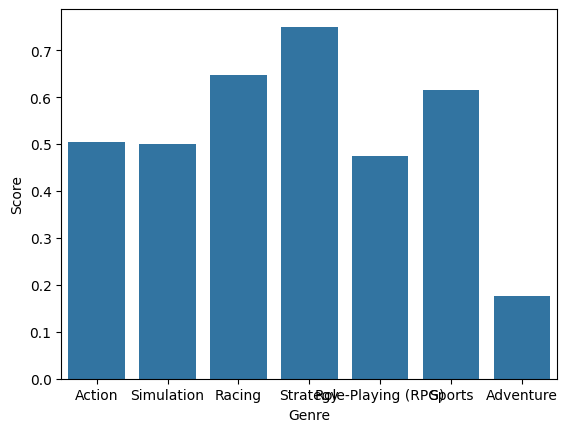

In [40]:
sns.barplot(df, x="Genre", y="Score", ci = False)
plt.show()

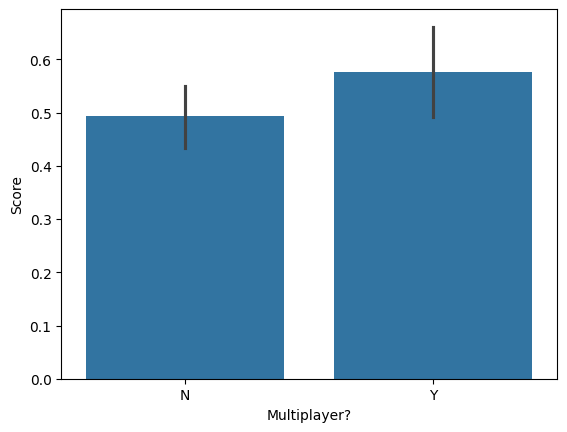

In [41]:
sns.barplot(df, x="Multiplayer?", y="Score")
plt.show()

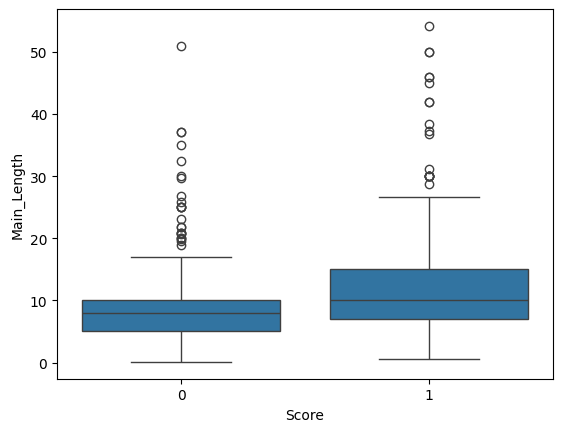

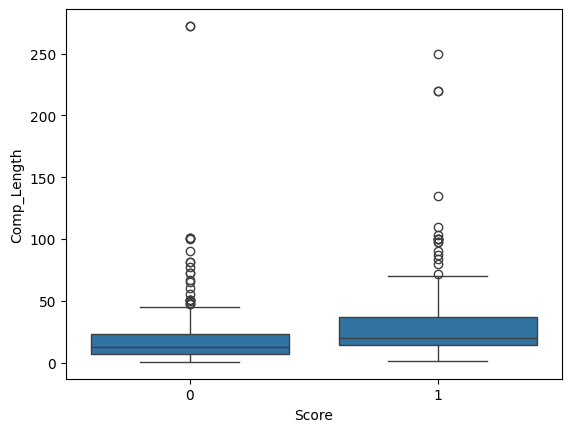

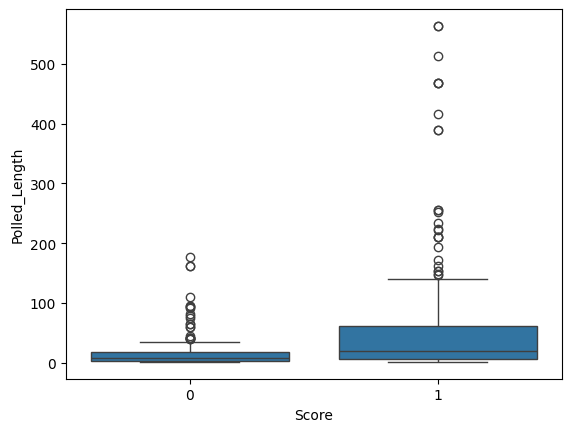

In [42]:
for x in ['Main_Length', 'Comp_Length', 'Polled_Length']:

  sns.boxplot(x='Score',y=x,data=df,)
  plt.show()

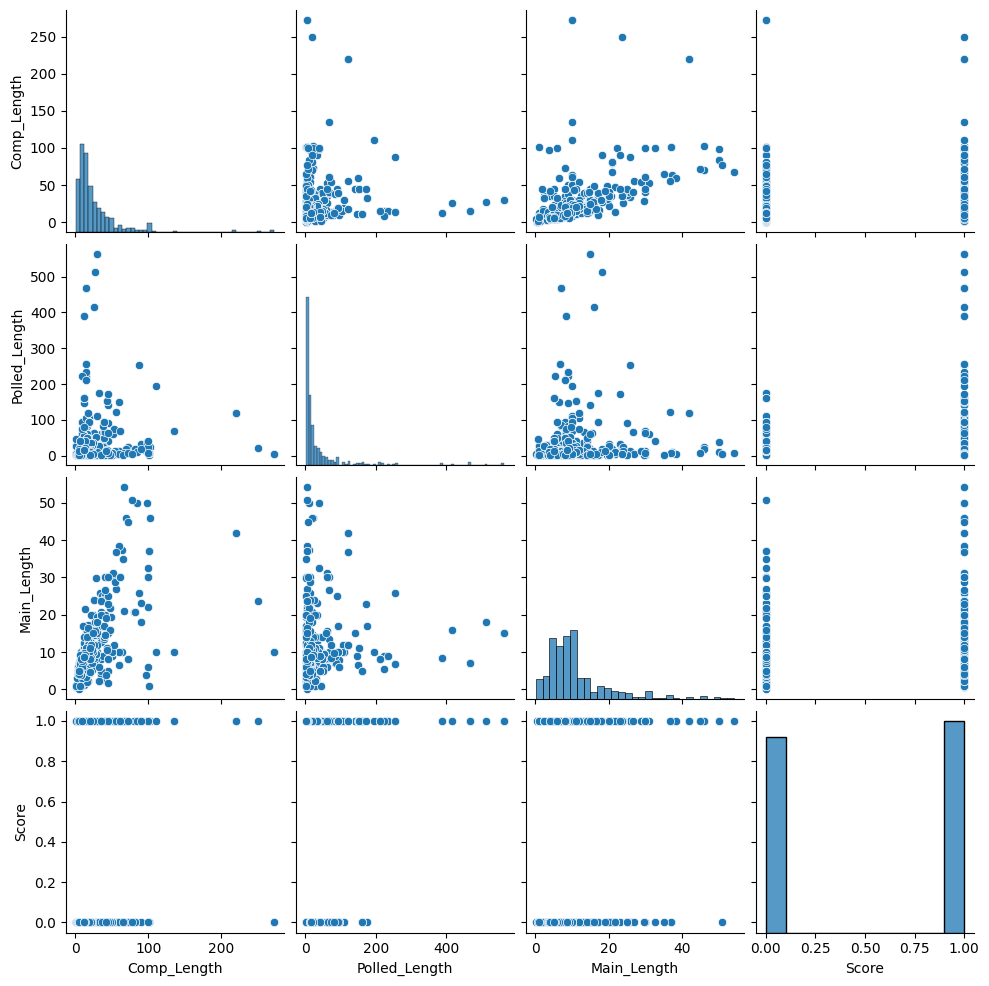

In [43]:
sns.pairplot(df)

In [44]:
df[['Main_Length', 'Comp_Length', 'Polled_Length', 'Score']].corr()

,Main_Length,Comp_Length,Polled_Length,Score
Main_Length,1.000000,0.547055,0.040530,0.196880
Comp_Length,0.547055,1.000000,0.028914,0.130530
Polled_Length,0.040530,0.028914,1.000000,0.267265
Score,0.196880,0.130530,0.267265,1.000000


### Interaction Effects

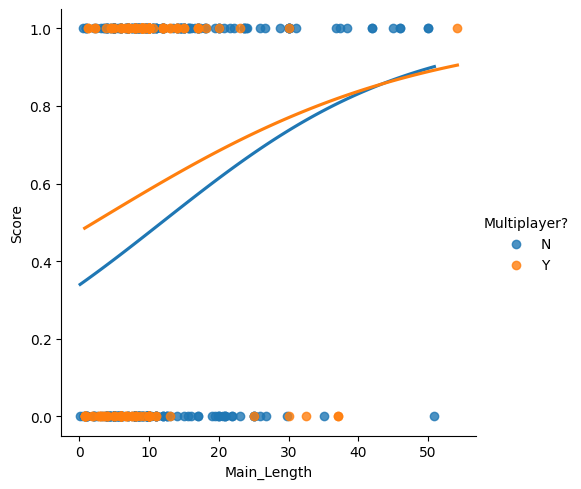

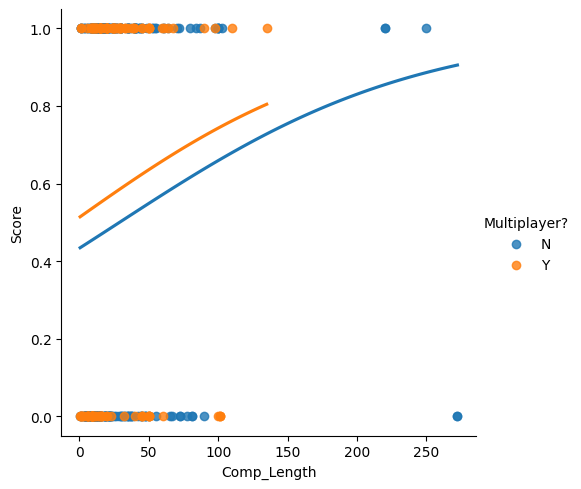

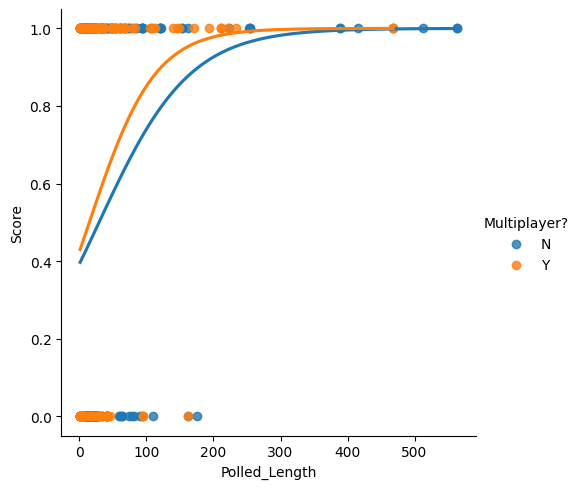

In [45]:
for x in ['Main_Length', 'Comp_Length', 'Polled_Length']:

  sns.lmplot(x=x,
              y='Score',
              hue='Multiplayer?',
              data=df,
            logistic=True,
            ci=False)
  plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.e

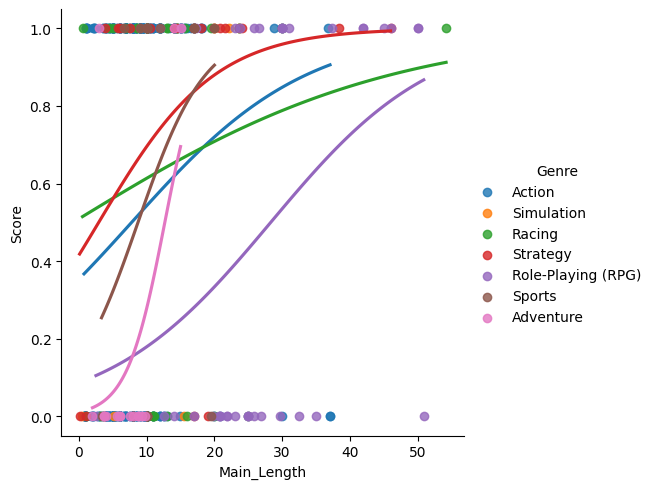

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


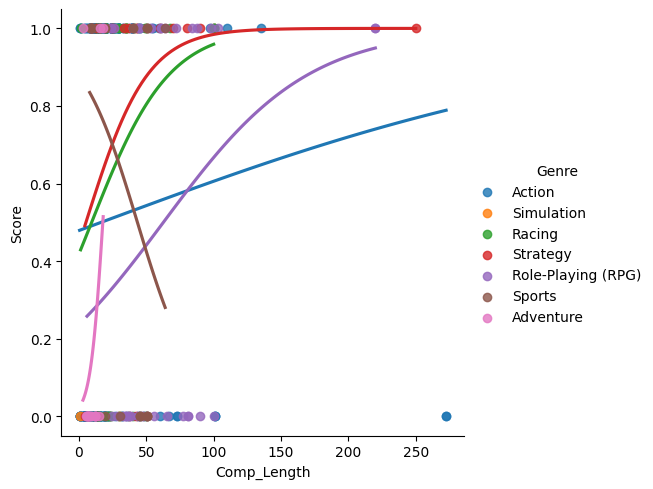

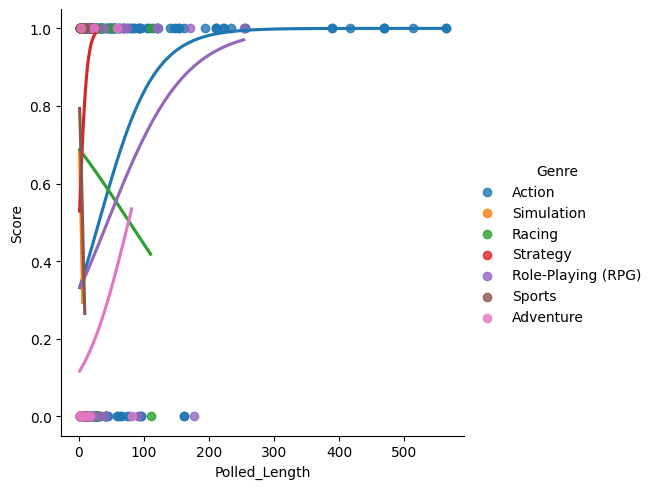

In [46]:
for x in ['Main_Length', 'Comp_Length', 'Polled_Length']:

  sns.lmplot(x=x,
              y='Score',
              hue='Genre',
              data=df,
            logistic=True,
            ci=False)
  plt.show()


There seems to be interactions with our numerical variables and Genre as the slopes differ greatly especially with Comp_Length and Polled_Length. There is less of an interaction with the Multiplayer variable.

## 5. Model Data Preprocessing

We start by creating the dummy variables, then we scaled the numerical variables, and lastly finished with combining the two df's into the final one. After that was done we created target array and features matrix.

In [ ]:
dfdummies = pd.get_dummies(df[["Genre", "Multiplayer?", "Score"]], drop_first=True, dtype=int)
dfdummies

,Score,Genre_Adventure,Genre_Racing,Genre_Role-Playing (RPG),Genre_Simulation,Genre_Sports,Genre_Strategy,Multiplayer?_Y
0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0
6,1,0,1,0,0,0,0,0
7,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
1202,0,0,0,0,0,0,1,0
1204,0,0,0,0,0,0,0,0
1206,0,0,0,1,0,0,0,0
1207,0,1,0,0,0,0,0,0


In [ ]:
dfNumerical = df[['Comp_Length','Polled_Length','Main_Length']]


In [ ]:
Scaler_training = StandardScaler()
scaled_expl_vars = Scaler_training.fit_transform(dfNumerical)
dfNumericalScaled = pd.DataFrame(scaled_expl_vars, columns = dfNumerical.columns)
dfNumericalScaled

,Comp_Length,Polled_Length,Main_Length
0,0.097149,-0.226315,0.391858
1,1.394893,-0.200747,-0.341418
2,0.098165,-0.469207,0.504669
3,-0.779362,-0.456423,-1.183744
4,1.621516,-0.354153,1.100691
...,...,...,...
423,0.470619,-0.328585,0.899510
424,-0.665035,-0.315802,-0.679852
425,-0.425201,-0.213531,-0.213564
426,-0.451623,-0.290234,-0.260569


In [ ]:
df = dfdummies.join(dfNumerical)
df

,Score,Genre_Adventure,Genre_Racing,Genre_Role-Playing (RPG),Genre_Simulation,Genre_Sports,Genre_Strategy,Multiplayer?_Y,Comp_Length,Polled_Length,Main_Length
0,1,0,0,0,0,0,0,0,30.000000,21,14.500000
4,0,0,0,0,0,0,0,0,72.566667,23,8.000000
5,0,0,0,0,1,0,0,0,30.033333,2,15.500000
6,1,0,1,0,0,0,0,0,1.250000,3,0.533333
7,1,0,0,0,0,0,1,0,80.000000,11,20.783333
...,...,...,...,...,...,...,...,...,...,...,...
1202,0,0,0,0,0,0,1,0,42.250000,13,19.000000
1204,0,0,0,0,0,0,0,0,5.000000,14,5.000000
1206,0,0,0,1,0,0,0,0,12.866667,22,9.133333
1207,0,1,0,0,0,0,0,0,12.000000,16,8.716667


In [ ]:
featurematrix = df.drop(['Score'], axis = 1)
featurematrix

,Genre_Adventure,Genre_Racing,Genre_Role-Playing (RPG),Genre_Simulation,Genre_Sports,Genre_Strategy,Multiplayer?_Y,Comp_Length,Polled_Length,Main_Length
0,0,0,0,0,0,0,0,30.000000,21,14.500000
4,0,0,0,0,0,0,0,72.566667,23,8.000000
5,0,0,0,1,0,0,0,30.033333,2,15.500000
6,0,1,0,0,0,0,0,1.250000,3,0.533333
7,0,0,0,0,0,1,0,80.000000,11,20.783333
...,...,...,...,...,...,...,...,...,...,...
1202,0,0,0,0,0,1,0,42.250000,13,19.000000
1204,0,0,0,0,0,0,0,5.000000,14,5.000000
1206,0,0,1,0,0,0,0,12.866667,22,9.133333
1207,1,0,0,0,0,0,0,12.000000,16,8.716667


In [ ]:
targetarray = df['Score']
targetarray

0       1
4       0
5       0
6       1
7       1
       ..
1202    0
1204    0
1206    0
1207    0
1210    0
Name: Score, Length: 428, dtype: int64

## 6. Feature Selection with k-Fold Cross-Validation

We will now use feature matrix and target array to create a k-Fold Cross Validation using backwards elimination to see which of the models would have the highest AUC, and thus, be the best at predicting future models. We will use a k-Fold sample of 5, with a random state of 100 using the full sample first, and then having models with each of the variables eliminated to see if there are any that can score higher.

In [ ]:
## Baseline

full_mod = LogisticRegression()
cross_val = KFold(n_splits = 5, shuffle = True, random_state = 100)
test_fold_auc = cross_val_score(full_mod, featurematrix, targetarray, cv = cross_val, scoring = "roc_auc")
print('AUC Values', test_fold_auc)
print('AUC Mean:', test_fold_auc.mean())
print('AUC STD:', test_fold_auc.std())

AUC Values [0.73152174 0.66694444 0.72601626 0.74277778 0.8306271 ]
AUC Mean: 0.7395774642358625
AUC STD: 0.0525825724842071


In [ ]:
featurematrix_2 = featurematrix.drop(['Comp_Length'], axis = 1)
cross_val = KFold(n_splits = 5, shuffle = True, random_state = 100)
test_fold_auc = cross_val_score(full_mod, featurematrix_2, targetarray, cv = cross_val, scoring = "roc_auc")
print('AUC Values', test_fold_auc)
print('AUC Mean:', test_fold_auc.mean())
print('AUC STD:', test_fold_auc.std())


AUC Values [0.73152174 0.6675     0.72682927 0.745      0.83286674]
AUC Mean: 0.7407435497489013
AUC STD: 0.05319410943626518


In [ ]:
featurematrix_3 = featurematrix.drop(['Polled_Length'], axis = 1)
cross_val = KFold(n_splits = 5, shuffle = True, random_state = 100)
test_fold_auc = cross_val_score(full_mod, featurematrix_3, targetarray, cv = cross_val, scoring = "roc_auc")
print('AUC Values', test_fold_auc)
print('AUC Mean:', test_fold_auc.mean())
print('AUC STD:', test_fold_auc.std())

AUC Values [0.68043478 0.63916667 0.66585366 0.66388889 0.79199328]
AUC Mean: 0.6882674555551729
AUC STD: 0.05353125801665499


In [ ]:
featurematrix_4 = featurematrix.drop(['Main_Length'], axis = 1)
cross_val = KFold(n_splits = 5, shuffle = True, random_state = 100)
test_fold_auc = cross_val_score(full_mod, featurematrix_4, targetarray, cv = cross_val, scoring = "roc_auc")
print('AUC Values', test_fold_auc)
print('AUC Mean:', test_fold_auc.mean())
print('AUC STD:', test_fold_auc.std())

AUC Values [0.70543478 0.65916667 0.73306233 0.72277778 0.77519597]
AUC Mean: 0.7191275052642926
AUC STD: 0.03777292483284339


In [ ]:
featurematrix_5 = featurematrix.drop(['Multiplayer?_Y'], axis = 1)
cross_val = KFold(n_splits = 5, shuffle = True, random_state = 100)
test_fold_auc = cross_val_score(full_mod, featurematrix_5, targetarray, cv = cross_val, scoring = "roc_auc")
print('AUC Values', test_fold_auc)
print('AUC Mean:', test_fold_auc.mean())
print('AUC STD:', test_fold_auc.std())

AUC Values [0.73070652 0.66944444 0.73170732 0.75138889 0.83258679]
AUC Mean: 0.7431667916519713
AUC STD: 0.05250733406737083


In [ ]:
featurematrix_6 = featurematrix[['Multiplayer?_Y', 'Comp_Length','Polled_Length','Main_Length']]
cross_val = KFold(n_splits = 5, shuffle = True, random_state = 100)
test_fold_auc = cross_val_score(full_mod, featurematrix_6, targetarray, cv = cross_val, scoring = "roc_auc")
print('AUC Values', test_fold_auc)
print('AUC Mean:', test_fold_auc.mean())
print('AUC STD:', test_fold_auc.std())

AUC Values [0.68478261 0.65527778 0.69674797 0.74444444 0.77911534]
AUC Mean: 0.7120736279885804
AUC STD: 0.04415406056048912


Based on the first rounds of backwards elimination, the model without mulitplayer would be the best at predicting datasets as it had the highest AUC mean. Now, we'll evaluate any potential combinations without Multiplayer and another variable.

In [ ]:
## Without multiplayer serving as the "Baseline"

featurematrix_5 = featurematrix.drop(['Multiplayer?_Y'], axis = 1)
cross_val = KFold(n_splits = 5, shuffle = True, random_state = 100)
test_fold_auc = cross_val_score(full_mod, featurematrix_5, targetarray, cv = cross_val, scoring = "roc_auc")
print('AUC Values', test_fold_auc)
print('AUC Mean:', test_fold_auc.mean())
print('AUC STD:', test_fold_auc.std())

AUC Values [0.73070652 0.66944444 0.73170732 0.75138889 0.83258679]
AUC Mean: 0.7431667916519713
AUC STD: 0.05250733406737083


In [ ]:
featurematrix_7 = featurematrix[['Comp_Length','Polled_Length','Main_Length']]
cross_val = KFold(n_splits = 5, shuffle = True, random_state = 100)
test_fold_auc = cross_val_score(full_mod, featurematrix_7, targetarray, cv = cross_val, scoring = "roc_auc")
print('AUC Values', test_fold_auc)
print('AUC Mean:', test_fold_auc.mean())
print('AUC STD:', test_fold_auc.std())

AUC Values [0.66494565 0.65111111 0.70514905 0.73861111 0.80403135]
AUC Mean: 0.7127696561739706
AUC STD: 0.05503355997284375


In [ ]:
featurematrix_8 = featurematrix.drop(['Main_Length', 'Multiplayer?_Y'], axis = 1)
cross_val = KFold(n_splits = 5, shuffle = True, random_state = 100)
test_fold_auc = cross_val_score(full_mod, featurematrix_8, targetarray, cv = cross_val, scoring = "roc_auc")
print('AUC Values', test_fold_auc)
print('AUC Mean:', test_fold_auc.mean())
print('AUC STD:', test_fold_auc.std())

AUC Values [0.70570652 0.66222222 0.73821138 0.72916667 0.77491601]
AUC Mean: 0.7220445612359381
AUC STD: 0.037291083976399055


In [ ]:
featurematrix_9 = featurematrix.drop(['Polled_Length', 'Multiplayer?_Y'], axis = 1)
cross_val = KFold(n_splits = 5, shuffle = True, random_state = 100)
test_fold_auc = cross_val_score(full_mod, featurematrix_9, targetarray, cv = cross_val, scoring = "roc_auc")
print('AUC Values', test_fold_auc)
print('AUC Mean:', test_fold_auc.mean())
print('AUC STD:', test_fold_auc.std())

AUC Values [0.65570652 0.61888889 0.66504065 0.655      0.79787234]
AUC Mean: 0.6785016802920111
AUC STD: 0.061735220020928155


In [ ]:
featurematrix_10 = featurematrix.drop(['Comp_Length', 'Multiplayer?_Y'], axis = 1)
cross_val = KFold(n_splits = 5, shuffle = True, random_state = 100)
test_fold_auc = cross_val_score(full_mod, featurematrix_10, targetarray, cv = cross_val, scoring = "roc_auc")
print('AUC Values', test_fold_auc)
print('AUC Mean:', test_fold_auc.mean())
print('AUC STD:', test_fold_auc.std())

AUC Values [0.73070652 0.66555556 0.73224932 0.74805556 0.83762598]
AUC Mean: 0.7428385870373383
AUC STD: 0.055215673648805454


After the second rounds of the backwards elimination process, the model with just multiplayer removed had the highest mean AUC at 0.743, which means that it would be the best model for our goal at predicting the score of video games for new datasets and will be the model used for our "Best Model Discussion".

## 7. Best Model Discussion

Using our model that we got from part 6, which is the model without multiplayer, we'll know use the model to create an equation with it to create slope interpretations, test the ROC and AoC as well as give the best predictive probability threshold. We'll do this by first splitting the dataset into a train-test split, fitting the model as well as looking for any signs of multicollinearity and overfitting.

In [ ]:
## Creating the "Best Dataset" and also using Train_Test Split
df_best = df.drop(['Multiplayer?_Y'], axis = 1)
df_best.rename(columns ={'Genre_Role-Playing (RPG)': 'Genre_Role_Playing'}, inplace = True)
df_train, df_test = train_test_split(df_best, test_size = 0.2, random_state = 100)
df_train.head()


,Score,Genre_Adventure,Genre_Racing,Genre_Role_Playing,Genre_Simulation,Genre_Sports,Genre_Strategy,Comp_Length,Polled_Length,Main_Length
710,1,0,0,0,0,0,0,27.000000,12,15.700000
928,1,0,0,0,0,0,0,19.000000,93,10.000000
1127,1,0,0,0,0,0,0,19.633333,11,11.000000
674,0,0,0,0,0,0,0,101.000000,6,37.066667
753,1,0,1,0,0,0,0,100.000000,8,30.000000


In [ ]:
## Fitting the Training and Test Models with features Matrix and Target Array

X_train = df_train.drop(['Score'], axis = 1)
y_train = df_train[['Score']]
X_test = df_test.drop(['Score'], axis = 1)
y_test = df_test[['Score']]

In [ ]:
## Equation using log_mod summary

log_mod = smf.logit(formula = 'Score~Genre_Adventure+Genre_Racing+Genre_Role_Playing+Genre_Simulation+Genre_Sports+Genre_Strategy+Comp_Length+Polled_Length+Main_Length', data = df_train).fit()
log_mod.summary()

Optimization terminated successfully.
         Current function value: 0.578429
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Score   No. Observations:                  342
Model:                          Logit   Df Residuals:                      332
Method:                           MLE   Df Model:                            9
Date:                Sun, 28 Apr 2024   Pseudo R-squ.:                  0.1630
Time:                        18:29:46   Log-Likelihood:                -197.82
converged:                       True   LL-Null:                       -236.35
Covariance Type:            nonrobust   LLR p-value:                 6.213e-13
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.2540      0.248     -5.065      0.000      -1.739      -0.769
Genre_Adventure       -1.2547      0.689     -1.820      0.069      -2.606       0.096
Genre_Racing           0.5915      0.444      1.332      0.183      -0.279       1.462
Genre_Role_Playing    -1.7327      0.669     -2.591      0.010      -3.044      -0.422
Genre_Simulation      -0.0068      0.893     -0.008      0.994      -1.756       1.743
Genre_Sports           0.8287      0.544      1.524      0.128      -0.237       1.895
Genre_Strategy         1.2211      0.633      1.930      0.054      -0.019       2.461
Comp_Length            0.0004      0.004      0.098      0.922      -0.008       0.009
Polled_Length          0.0194      0.004      4.371      0.000       0.011       0.028
Main_Length            0.0840      0.024      3.550      0.000       0.038       0.130
======================================================================================
"""

Probability(Score >= 72)^ = 1 / 1 + e^(-1.2540 -1.2547*Genre_Adventure +0.5915*Genre_Racing -1.7327*Genre_Role_Playing -0.0068*Genre_Simulation +0.8287*Genre_Sports + 1.2211*Genre_Strategy +0.0004*Comp_Length +0.0194*Polled_Length + 0.0840*Main_Length)

In [ ]:
## Multicollinearity
df_train[['Comp_Length', 'Polled_Length', 'Main_Length']].corr()

,Comp_Length,Polled_Length,Main_Length
Comp_Length,1.000000,0.042722,0.550646
Polled_Length,0.042722,1.000000,0.044217
Main_Length,0.550646,0.044217,1.000000


There are no instances of multicollinearity as the correlation coeffecients between all the numerical variables are less than 0.7.

Slope Interpretations.

To an extent, we are able to intepret the slope values as all the numerical variables have been scaled in the logistical model, which means that we can more accurately have slope interpretations as all the variables are to scale, however the the genre variables have not been scaled and thus have higher standard errors, which makes the interpretations less apparent. We can see from the slope values that Genre as a whole has a very important influence on the score of a videogame, with Role-Playing, Adventure and Racing having the largest slope values, whereas the Main_length has the most importance when it comes to the various length variables in the regression, however should note the higher standard errors of the genre variables.

<Axes: xlabel='Genre_Racing'>

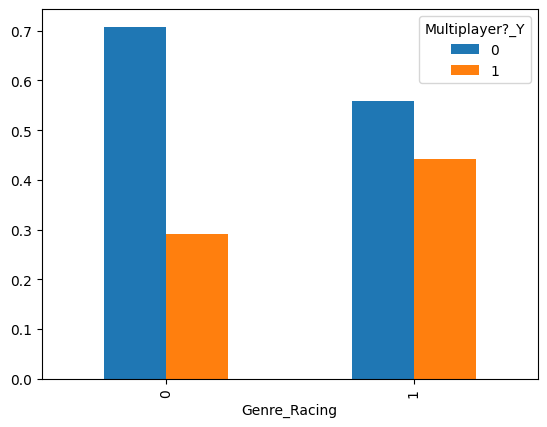

In [ ]:
## Overfitting Variables

temp = pd.crosstab(df['Genre_Racing'], df['Multiplayer?_Y'], normalize = 'index')
temp.plot.bar()

<Axes: xlabel='Genre_Sports'>

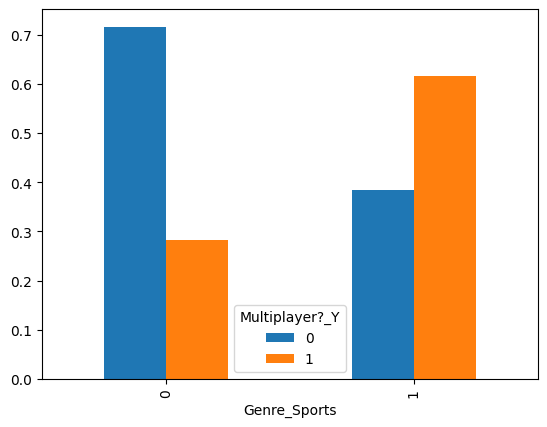

In [ ]:
temp = pd.crosstab(df['Genre_Sports'], df['Multiplayer?_Y'], normalize = 'index')
temp.plot.bar()

There was an overfitting variable with Multiplayer. As seen by the visuals above and in part 4, Multiplayer does have an association with the other variabels, and in particular with Genre, which reults in it having a lower test AUC Score. Also based on the visuals from part 4, Multiplayer did not have as strong of an association with score as the genre did.

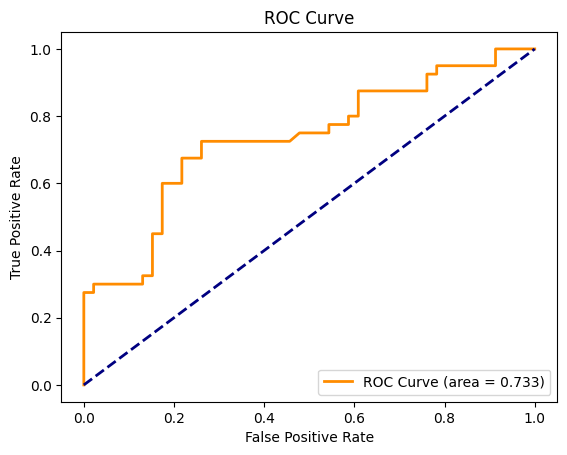

In [ ]:
## AUC Plot
df_test['predictive_prob'] = log_mod.predict(df_test)
df_test[['predictive_prob', 'Score']]
fprs, tprs, thresholds = roc_curve(y_true = df_test['Score'],
                                   y_score = df_test['predictive_prob'])
auc = roc_auc_score(y_true = df_test['Score'],
                    y_score = df_test['predictive_prob'])

def plot_roc(fprs, tprs, auc, lw = 2):
    plt.plot(fprs, tprs, color = 'darkorange', lw = lw,
             label = 'ROC Curve (area = '+str(round(auc,3))+')')
    plt.plot([0,1], [0,1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc = "lower right")
    plt.show()

plot_roc(fprs, tprs, auc)

The test ROC and AUC results in an area of about 0.733, which means that our logistcal model has a fairly accurate ability to classify observations in the test dataset and thus, for future models.

Best Predictive Probability Threshold:

Since we want our model to accurately predict the score of new video games above our median, we'd want the False Positive Rate, or the rate a low review scored game to be well recieved, to be as low as possible while also maintaining a high True Positive Rate, or the rate which highly recieved games are recieved well. As a result, an optimal threshold to reach this goal would be around 0.7 TPR, 0.22 TFR as it would have a pretty high TPR while also having a low TFR, which would sastify both of our goals for the optimal threshold we are looking for.

## 8. Additional Analysis/Insight

For the additional insight section, we'll analyze the AIC and BIC of our model. These are two statistics that calculate the parsimonious of our model, with a lower score being better. We haven't really looked too much into the parsimonious of our model yet, so this statistic can provide some valuable insight into our model and the future goals of predicting new datasets. We'll be doing this by comparing our full dataframe compared to our reduced one, and seeing if there is a difference between the two.

In [ ]:
df.rename(columns ={'Genre_Role-Playing (RPG)': 'Genre_Role_Playing',
                    'Multiplayer?_Y': 'Multiplayer'}, inplace = True)
log_mod = smf.logit(formula = 'Score~Genre_Adventure+Genre_Racing+Genre_Role_Playing+Genre_Simulation+Genre_Sports+Genre_Strategy+Multiplayer+Comp_Length+Polled_Length+Main_Length', data = df).fit()
print('Model AIC:', log_mod.aic)
print('Model BIC:', log_mod.bic)

Optimization terminated successfully.
         Current function value: 0.582269
         Iterations 7
Model AIC: 520.4222142226844
Model BIC: 565.0725693740842


In [ ]:

log_mod_red = smf.logit(formula = 'Score~Genre_Adventure+Genre_Racing+Genre_Role_Playing+Genre_Simulation+Genre_Sports+Genre_Strategy+Comp_Length+Polled_Length+Main_Length', data = df).fit()
print('Model AIC:', log_mod_red.aic)
print('Model BIC:', log_mod_red.bic)


Optimization terminated successfully.
         Current function value: 0.582817
         Iterations 7
Model AIC: 518.8917301503068
Model BIC: 559.4829621061248


As expected, the model without Multiplayer has a lower AIC and BIC than with it, which coincides with the results from the model AUC scores that the reduced model would be better for future datasets. This also helps with our secondary goal, as the lower scores means the reduced model is more Parsimonious, as our model will have more reliable conclusions.

## 9. Conclusion

In conclusion, the model that best follows our goals of both building a model that predicts the Review Score for future models and also have reliable data is a logistic regression model with Genre, Complete Length, Polled Length, and Main Length. Based on the high mean AUC score at 0.733, the model would be good at predicting the future scores of Video games, and thus can be applied and reccomended to others, however should be used cautiously as the score is not perfect and can be prone to mistakes. Another issue is that the model might not be the most effective for future models due to the small sample size, even with k-means, that was conducted and how close some of the model AUC scores were to each other. A k-fold means with more samples and even more backwards elimination steps can be done to investigate with even more confidence which model or combination of variables would result in the most effective model for future predictions. There are also other shortcomings with the dataset itself, such as not being the most updated, especially as the Videogame industry is different now than it was during September 2011, and thus can render some of the conclusions potentially outdated. One area of future investigation would be to evaulate whether these factors that contribute to high video game review scores result in better sales, as it can be an area that developers can utilize to predict not only their review scores, but also their sales of a game they were to make.

### References

Bycer, Josh. “The Impact of Videogame Criticism.” Game Developer, Game Developer, 9 Dec. 2023, www.gamedeveloper.com/design/the-impact-of-videogame-criticism.

Cox, Joe. “What Makes a Blockbuster Video Game? An Empirical Analysis of US Sales Data.” University of Portsmouth, John Wiley and Sons Ltd, 26 July 2023, researchportal.port.ac.uk/portal/en/publications/what-makes-a-blockbuster-video-game(a6d848fe-38ae-4584-8c95-a0f735ec9b4c)/export.html.

“Video Game Reviews Really Do Matter.” NBCNews.Com, NBCUniversal News Group, 7 July 2010, www.nbcnews.com/id/wbna38121779.
